<a href="https://colab.research.google.com/github/JLCdata/Tesis-Magister/blob/main/notebooks/notebooks%20solution%20based%20on%20RL/clean%201.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lectura y guardado de información google colab





---



### Acceso a datos

In [1]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/data_tesis_mds'

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/data_tesis_mds

consolidation_15December2022.csv  df_index_2018.gsheet	df_index_2021.csv
data				  df_index_2019.csv	df_index_2022.csv
df_index_2018.csv		  df_index_2020.csv


In [ ]:
! ls

drive  sample_data




---



### Import libraries & read data

In [2]:
import warnings
warnings.filterwarnings("ignore")

from pathlib import Path
import json
from io import StringIO

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from numpy import mean,sqrt,square
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
pd.set_option('display.max_columns', None)


In [3]:
!pip install pandarallel
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=False, nb_workers=16)

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 3.8 MB/s eta 0:00:00
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16672 sha256=6b5b9f59fbd5625784d237c23969d8f8833cd1e64bcc871b3b114c2ba09d2059
  Stored in directory: /root/.cache/pip/wheels/50/4f/1e/34e057bb868842209f1623f195b74fd7eda229308a7352d47f
Successfully built pandarallel
INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [4]:
file_path = Path().joinpath(path, "data", "meta data","json_dictionary.json")

with open(file_path, 'r',) as file:
    content = file.read()

df_dictionary=pd.DataFrame(json.loads(content))
tags_cc=df_dictionary.tag.to_list()
dic={i:j for i,j in zip(df_dictionary.tag,df_dictionary.description)}
dic

{'CF:CVB007_S2.PNT.FOX': 'granulometry',
 'CF:225.WIC8067.MEAS.FOX': 'charge cell',
 'disp_ley_pirita': 'pyrite law',
 'disp_ley_calcopirita': 'chalcopyrite law',
 'disp_ley_calcosina': 'chalcocite law',
 'disp_crusher_index': 'crusher index',
 'disp_sag_power_index': 'sag power index',
 'disp_ball_work_index': 'ball work index',
 'CF:215.WIC1605A.MEAS.FOX': 'TPH',
 'CF:EXPERTO:EXP_MS_A.MEAS_5.FOX': 'HH TPH',
 'CF:EXPERTO:EXP_MS_A.MEAS_1.FOX': 'LL charge cell',
 'CF:EXPERTO:EXP_MS_A.MEAS_7.FOX': 'HH charge cell',
 'disp_ley_bornita': 'bornite law',
 'disp_ley_covelina': 'covelin law',
 'CF:225.SI8160.PNT.FOX': 'speed',
 'CF:225:FIC1701CA_RI02.FOX': 'solid',
 'CF:215.PORC_SOLD.PNT.FOX': 'solid percentage',
 'CF:225.JI8161.PNT.FOX': 'power',
 'CF:225.OI8162.PNT.FOX': 'torque',
 'CF:225.II8163.PNT.FOX': 'stator current',
 'CF:EXPERTO.HAB_EXP.CO_1.FOX': 'sag mill expert system',
 'CF:225.FIC1701.MEAS.FOX': 'water'}

In [5]:
file_path = Path().joinpath(path, "consolidation_15December2022.csv",)

with open(file_path, 'r') as file:
    content = file.read()

# parse consolidation to df
df = pd.read_csv(StringIO(content),parse_dates=['Timestamp'], index_col='Timestamp').rename(columns=dic)
df.head()

,sag mill expert system,Limitado por Límite Alto de Tonelaje,Optimizando tonelaje,Limitado por Peso,Limitado por Corriente Bobina,Limitado por torque espesador 2,Limitado por torque espesador 3,Limitado por Potencia Bolas 1,Limitado por Potencia Bolas 2,Limitado por Pebbles,Limitado por Corriente harnero,Limitado por Potencia SAG,Limitado por limite bajo de tonelaje,Limitado por Temperatura bobina,Limitado por presión espesador 2,Limitado por presión espesador 3,pyrite law,chalcopyrite law,chalcocite law,covelin law,crusher index,sag power index,ball work index,bornite law,torque,charge cell,power,TPH,solid percentage,water,speed,solid,LL charge cell,HH charge cell,HH TPH,stator current,granulometry
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.499208,864.295848,23071.203516,3847.009774,65.090716,2063.724810,9.063008,65.0,820.0,900.0,4350.0,3935.520368,63.702719
2018-01-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.410009,862.125504,23043.030173,3872.996001,65.171210,2072.257994,9.062102,65.0,820.0,900.0,4350.0,3930.839200,62.920996
2018-01-01 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.261466,859.956386,22991.287211,3879.211149,65.122192,2079.820066,9.062520,65.0,820.0,900.0,4350.0,3923.503230,62.847943
2018-01-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.115891,858.914758,22943.243462,3894.792946,65.085609,2089.536865,9.062208,65.0,820.0,900.0,4350.0,3914.689267,63.369101
2018-01-01 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.054172,857.932221,22921.665087,3959.416847,65.271563,2110.715057,9.062822,65.0,820.0,900.0,4350.0,3910.292390,63.409187


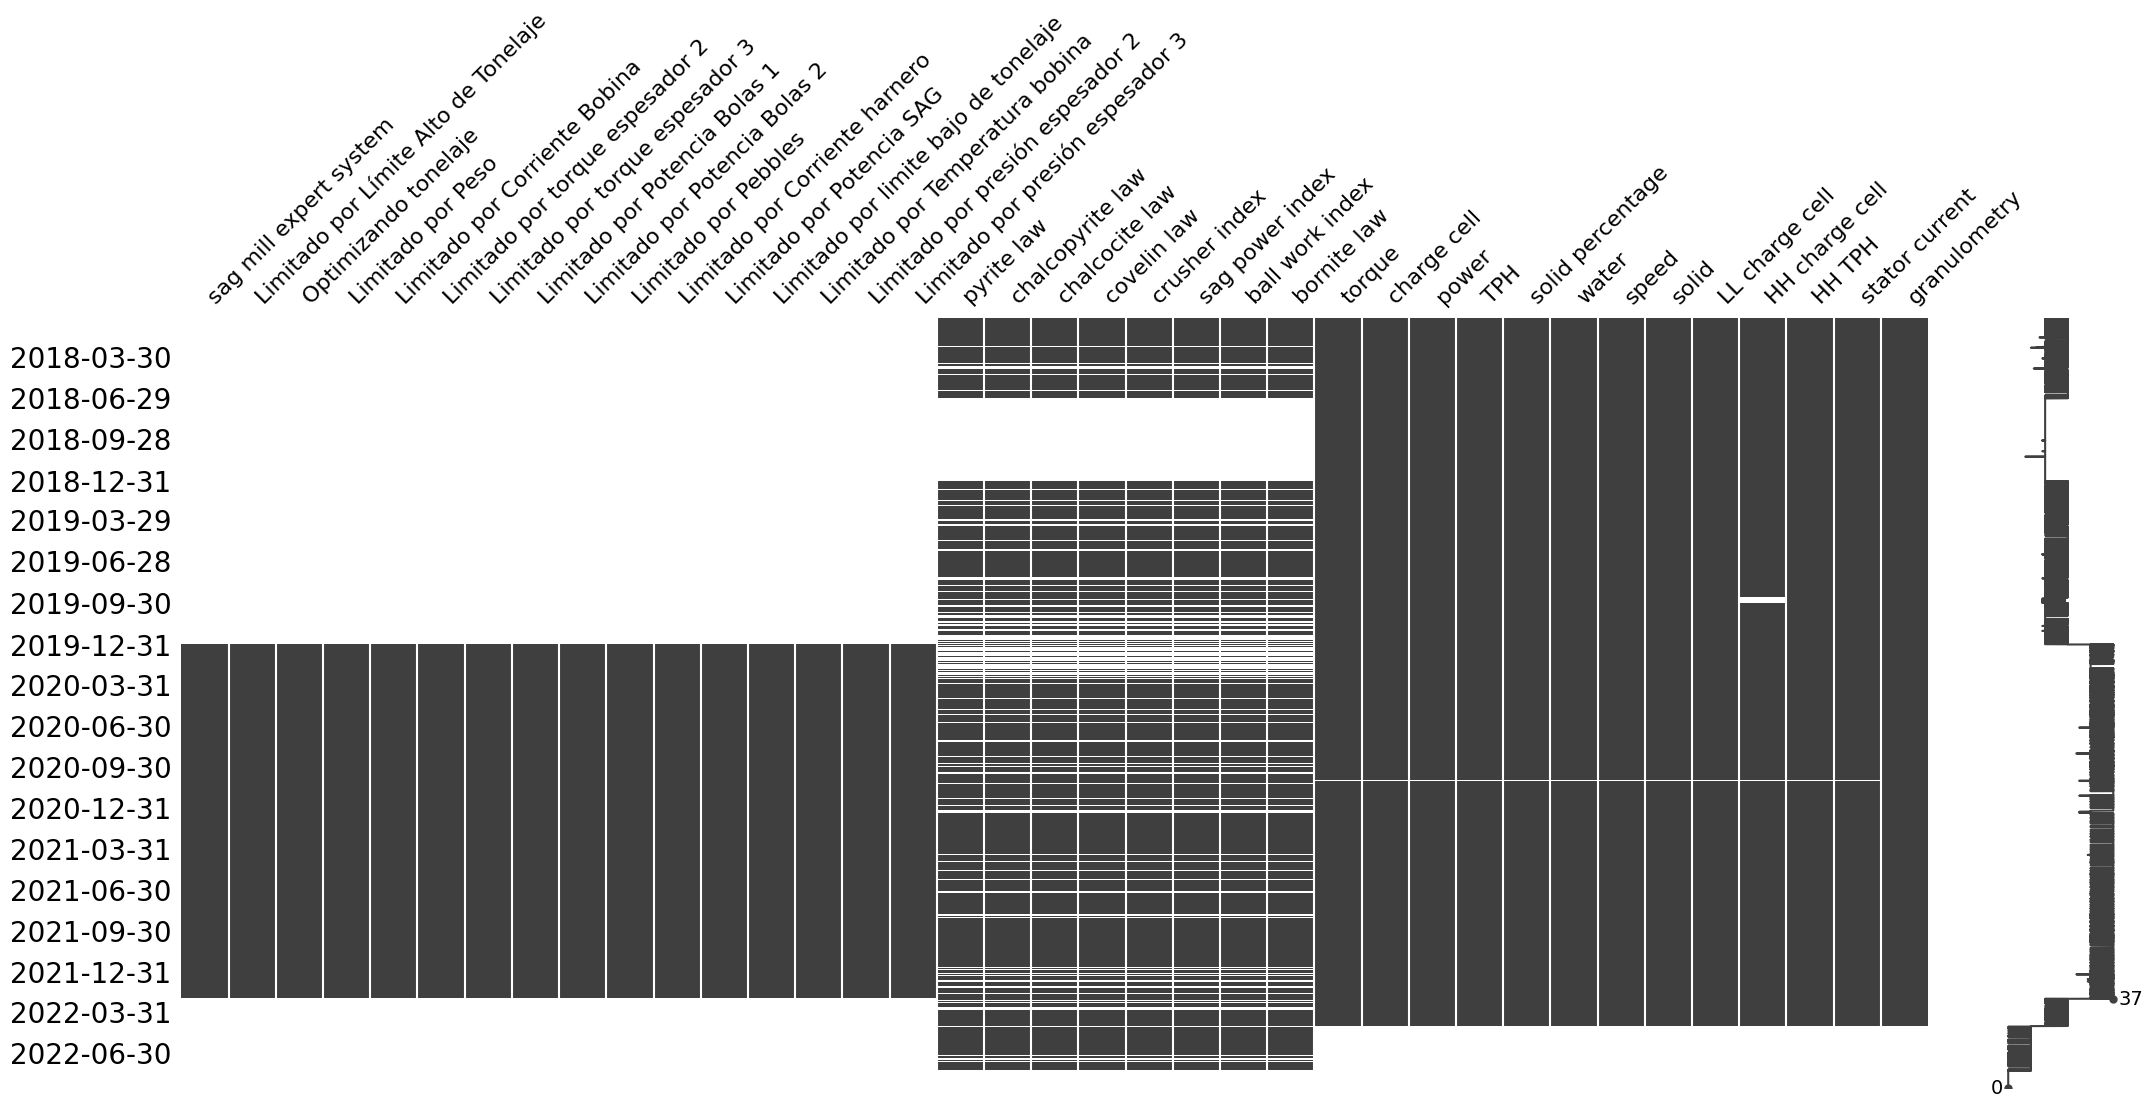

In [6]:
# Missings
msno.matrix(df,freq='BQ')
plt.show()

-------------------------------------------


In [7]:
df_clean=df.copy()

In [8]:
# HH fill with LL
df_clean["HH charge cell"][df_clean["HH charge cell"].isnull()]=df_clean["LL charge cell"][df_clean["HH charge cell"].isnull()]+80

# LL fill with HH
df_clean["LL charge cell"][df_clean["LL charge cell"].isnull()]=df_clean["HH charge cell"][df_clean["LL charge cell"].isnull()]-80

In [9]:
df_clean["delta HH TPH"]=df_clean["HH TPH"]-df_clean["TPH"]
df_clean["loss of TPH"]=df_clean["delta HH TPH"].parallel_apply(lambda x: 1 if x>100 else 0)
df_clean["delta LL charge cell"]=df_clean["charge cell"]-df_clean["LL charge cell"]
df_clean["low load cell"]=df_clean["delta LL charge cell"].parallel_apply(lambda x: 1 if x<1 else 0)

In [10]:
df_clean["delta HH charge cell"]=df_clean["HH charge cell"]-df_clean["charge cell"]
df_clean["high load cell"]=df_clean["delta HH charge cell"].parallel_apply(lambda x: 1 if x<5 else 0)

In [11]:
# Información de perdida de TPH en los proximos 5 minutos
for i in range(1,6):
    df_clean[f"loss of TPH_{i}"]=df_clean["loss of TPH"].shift(i)


In [12]:
# Información de low load cell en los proximos 5 minutos
for i in range(1,6):
    df_clean[f"low load cell_{i}"]=df_clean["low load cell"].shift(i)



In [13]:
# Información de high load cell en los proximos 5 minutos
for i in range(1,6):
    df_clean[f"high load cell_{i}"]=df_clean["high load cell"].shift(i)


In [14]:
# Suavización del estado de perdida
df_clean["loss of TPH"]=df_clean.parallel_apply(lambda x: 1 if (x['loss of TPH']==1) or (x['loss of TPH_1']==1) or
                                                     (x['loss of TPH_2']==1) or (x['loss of TPH_3']==1) or (x['loss of TPH_4']==1) or (x['loss of TPH_5']==1) else 0,axis=1)


In [15]:
# Suavización de low cc
df_clean["low load cell"]=df_clean.parallel_apply(lambda x: 1 if (x['low load cell']==1) or (x['low load cell_1']==1) or
                                                     (x['low load cell_2']==1) or (x['low load cell_3']==1) or (x['low load cell_4']==1) or (x['low load cell_5']==1) else 0,axis=1)


In [16]:
# Suavización de high cc
df_clean["high load cell"]=df_clean.parallel_apply(lambda x: 1 if (x['high load cell']==1) or (x['high load cell_1']==1) or
                                                     (x['high load cell_2']==1) or (x['high load cell_3']==1) or (x['high load cell_4']==1) or (x['high load cell_5']==1) else 0,axis=1)


In [17]:
# Select first of vector of events cases (0) and append into DF:
def inicio(DF, variable):
       first_case_atollo = [0]
       for x in range(1, len(DF)):
              if((DF.loc[DF.index[x], variable] == 1) & (DF.loc[DF.index[x-1], variable] == 0)):
                     first_case_atollo.append(1)
              else:
                     first_case_atollo.append(0)

       return first_case_atollo

# Select last of vector of events cases (0) and append into DF:
def final(DF, variable):
       last_case_atollo = []
       for x in range((len(DF)-1)):
              if((DF.loc[DF.index[x], variable] == 1) & (DF.loc[DF.index[x+1], variable] == 0)):
                     last_case_atollo.append(1)
              else:
                     last_case_atollo.append(0)
       last_case_atollo.append(1)

       return last_case_atollo

# Create function Atollo_mod: 0 when initial atollo; 2 when not initial atollo; 1 when no atollo:
def event_start(DF,variable):

    DF[f'start {variable}']=inicio(DF=DF, variable=variable)
    DF[f'end {variable}']=final(DF=DF, variable=variable)

    # Create Atollo_mod:
    variable_mod = str(variable+'_mod')
    DF[variable_mod] =  DF[variable].replace(1,2)
    DF.loc[DF[f'start {variable}']==1,variable_mod]=1

    return DF

In [18]:
df_clean=event_start(df_clean,"loss of TPH")
df_clean=event_start(df_clean,"low load cell")
df_clean=event_start(df_clean,"high load cell")

In [23]:
# Write a sample file to Google Drive
with open(file_path, 'w') as f:
  f.write(str(df_clean))

In [26]:
file_path = Path().joinpath(path,"precleaned_"+pd.to_datetime('today').strftime('%d%B%Y')+'.csv',)
df_clean.to_csv(file_path,index=True)

In [27]:
file_path = Path().joinpath(path,"precleaned_"+pd.to_datetime('today').strftime('%d%B%Y')+'.csv',)

with open(file_path, 'r') as file:
    content = file.read()

# parse consolidation to df
df = pd.read_csv(StringIO(content),parse_dates=['Timestamp'], index_col='Timestamp')
df.head()

,Timestamp,sag mill expert system,Limitado por Límite Alto de Tonelaje,Optimizando tonelaje,Limitado por Peso,Limitado por Corriente Bobina,Limitado por torque espesador 2,Limitado por torque espesador 3,Limitado por Potencia Bolas 1,Limitado por Potencia Bolas 2,Limitado por Pebbles,Limitado por Corriente harnero,Limitado por Potencia SAG,Limitado por limite bajo de tonelaje,Limitado por Temperatura bobina,Limitado por presión espesador 2,Limitado por presión espesador 3,pyrite law,chalcopyrite law,chalcocite law,covelin law,crusher index,sag power index,ball work index,bornite law,torque,charge cell,power,TPH,solid percentage,water,speed,solid,LL charge cell,HH charge cell,HH TPH,stator current,granulometry,delta HH TPH,loss of TPH,delta LL charge cell,low load cell,delta HH charge cell,high load cell,loss of TPH_1,loss of TPH_2,loss of TPH_3,loss of TPH_4,loss of TPH_5,low load cell_1,low load cell_2,low load cell_3,low load cell_4,low load cell_5,high load cell_1,high load cell_2,high load cell_3,high load cell_4,high load cell_5,start loss of TPH,end loss of TPH,loss of TPH_mod,start low load cell,end low load cell,low load cell_mod,start high load cell,end high load cell,high load cell_mod
0,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.499208,864.295848,23071.203516,3847.009774,65.090716,2063.724810,9.063008,65.0,820.0,900.0,4350.0,3935.520368,63.702719,502.990226,1,44.295848,0,35.704152,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2,0,0,0,0,0,0
1,2018-01-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.410009,862.125504,23043.030173,3872.996001,65.171210,2072.257994,9.062102,65.0,820.0,900.0,4350.0,3930.839200,62.920996,477.003999,1,42.125504,0,37.874496,0,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0,0,2,0,0,0,0,0,0
2,2018-01-01 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.261466,859.956386,22991.287211,3879.211149,65.122192,2079.820066,9.062520,65.0,820.0,900.0,4350.0,3923.503230,62.847943,470.788851,1,39.956386,0,40.043614,0,1.0,1.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,2,0,0,0,0,0,0
3,2018-01-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.115891,858.914758,22943.243462,3894.792946,65.085609,2089.536865,9.062208,65.0,820.0,900.0,4350.0,3914.689267,63.369101,455.207054,1,38.914758,0,41.085242,0,1.0,1.0,1.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0,0,2,0,0,0,0,0,0
4,2018-01-01 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.054172,857.932221,22921.665087,3959.416847,65.271563,2110.715057,9.062822,65.0,820.0,900.0,4350.0,3910.292390,63.409187,390.583153,1,37.932221,0,42.067779,0,1.0,1.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,0,2,0,0,0,0,0,0


In [19]:
df_visualization=df_clean["2021-01"].copy()
df_visualization.shape

(44640, 67)

In [ ]:
titulos=tuple(["TPH y setpoint TPH", "Celda de carga y setpoints","start low load cell", "start high load cell", "start loss of TPH",
               "loss of TPH","low load cell","high load cell"
               ])
fig = make_subplots(
    rows=8, cols=1,
    subplot_titles=titulos,
     shared_xaxes=True,
     vertical_spacing=0.05
    )

fig.add_trace(go.Scatter(x=df_visualization.index, y=df_visualization['TPH'], ##FF6511
                    mode='lines',
                    name="TPH",line=dict(width=3, ),legendgroup = '1'),row=1, col=1)

fig.add_trace(go.Scatter(x=df_visualization.index, y=df_visualization['HH TPH'], ##FF6511
                    mode='lines',
                    name="HH TPH",line=dict(width=3, ),legendgroup = '1'),row=1, col=1)


fig.add_trace(go.Scatter(x=df_visualization.index, y=df_visualization['HH charge cell'],
                    mode='lines',
                    name="HH charge cell",line=dict(width=1, ),legendgroup = '1',showlegend=False),row=2, col=1)

fig.add_trace(go.Scatter(x=df_visualization.index, y=df_visualization['HH charge cell']-80,
                    mode='lines',
                    name="LL charge cell",line=dict(width=1, ),legendgroup = '1',fill='tonexty',showlegend=False),row=2, col=1)


fig.add_trace(go.Scatter(x=df_visualization.index, y=df_visualization['charge cell'],
                    mode='lines',
                    name="charge cell",line=dict(width=3, ),legendgroup = '1'),row=2, col=1)


fig.add_trace(go.Scatter(x=df_visualization.index, y=df_visualization["start low load cell"],
                    mode='lines',
                    name="start low load cell",line=dict(width=3, ),legendgroup = '1'),row=3, col=1)


fig.add_trace(go.Scatter(x=df_visualization.index, y=df_visualization["start high load cell"],
                    mode='lines',
                    name="start high load cell",line=dict(width=3, ),legendgroup = '1'),row=4, col=1)


fig.add_trace(go.Scatter(x=df_visualization.index, y=df_visualization["start loss of TPH"],
                    mode='lines',
                    name="start loss of TPH",line=dict(width=3, ),legendgroup = '1'),row=5, col=1)


fig.add_trace(go.Scatter(x=df_visualization.index, y=df_visualization["loss of TPH"],
                    mode='lines',
                    name="loss of TPH",line=dict(width=3, ),legendgroup = '1'),row=6, col=1)

fig.add_trace(go.Scatter(x=df_visualization.index, y=df_visualization["low load cell"],
                    mode='lines',
                    name="low load cell",line=dict(width=3, ),legendgroup = '1'),row=7, col=1)

fig.add_trace(go.Scatter(x=df_visualization.index, y=df_visualization["high load cell"],
                    mode='lines',
                    name="high load cell",line=dict(width=3, ),legendgroup = '1'),row=8, col=1)

fig.update_layout(height=700, width=1200, title_text="Análisis series de tiempo")
fig.update_layout(hovermode="x unified")

fig.show()

In [ ]:
# Limpieza data dispatch
df_clean['pyrite law'][~(df_clean['pyrite law'] <= 6)]=np.nan
df_clean['chalcopyrite law'][~(df_clean['chalcopyrite law'] <= 10)]=np.nan
df_clean['ball work index'][~(df_clean['ball work index'] >= 10)]=np.nan
df_clean['crusher index'][~(df_clean['crusher index']>=10)]=np.nan
df_clean['solid percentage'][~(df_clean['solid percentage'].between(62, 82))]=np.nan

# Considerar solo cuando HH TpH está alto
df_clean['HH TPH'][~(df_clean['HH TPH'] >= 3000)]=np.nan

# Correccion y limpieza TPH
df_clean['TPH'][~(df_clean['TPH'] >= 2000)]=np.nan
df_clean['TPH'][~(df_clean['TPH'] <= 4800)]=np.nan

# Limpieza CC
df_clean['charge cell'][~(df_clean['charge cell'] <= 1000)]=np.nan

# Limpieza granulometria
df_clean['granulometry'][~(df_clean['granulometry'] >= 20)]=np.nan

df_clean['granulometry'] = df_clean['granulometry'].rolling(7, center=True).apply(np.nanmean)

df_clean['granulometry'][(df_clean['granulometry'].diff()== 0)]=np.nan

# Función de clean
def clean(df):
    feat_trim = {}
    X=df.copy()
    for i in X.columns:
        # Outlier removal by frequency
        mu = X[i].mean()
        sigma = X[i].std()
        X[i] = X[i].parallel_apply(lambda x: np.nan if x>mu+3*sigma else np.nan if x<mu-3*sigma else x)
        feat_trim['mu_'+i] = mu
        feat_trim['sigma_'+i] = sigma
    return X

tags=dic.values()

# Clean
df_clean=clean(df_clean[tags])

# Interpolate Nans in features
for tag in tags:
  df_clean[tag] = df_clean[tag].interpolate(limit = 15)

df_clean = df_clean.merge(df[["Optimizando tonelaje","Limitado por Peso"]], left_index=True, right_index=True, how='left')

df_clean.head()

In [ ]:
# Missings
msno.matrix(df_clean,freq='BQ')
plt.show()

In [ ]:
# Se guarda en csv
df_clean.to_csv('../../data/consolidated data/cleaned_'+pd.to_datetime('today').strftime('%d%B%Y')+'.csv', index=True)

### Comando utiles

In [ ]:
# Create a folder in the root directory
!mkdir -p "/content/drive/MyDrive/test"

In [ ]:
# Write a sample file to Google Drive
with open('/content/drive/My Drive/test/sample.txt', 'w') as f:
  f.write('Hello, World!')